In [178]:
# def CFI(phi, t_1, t_2, gamma):
#     return (-4 * (gamma-1) * np.exp(t_1 / t_2) * np.sin(phi)**2) / ((np.exp(t_1 / t_2)-np.cos(phi)**2)*(gamma * np.cos(phi)+(gamma-2) * np.exp(t_1 / t_2))**2)

# CFI_2 = CFI(0.1 , 0.5, 0.3, 0.8)


# CFI_1



In [179]:
# import pennylane as qml
# from pennylane import numpy as np

import numpy as np
import matplotlib.pyplot as plt


gamma = 0
t1, t2 = 1,2 * 1000
# t1, t2 = 4,2*100000000000


def CFI_2(phi):
    num_0 = (-np.sin(phi) * (gamma - 1) * (np.exp(t1/t2) + np.cos(phi)) + (gamma - 1) * np.sin(phi) * (gamma * np.cos(phi) + (gamma - 2) * np.exp(t1/t2)))
    den_0 = (gamma * np.cos(phi) + (gamma - 2) * np.exp(t1/t2)) ** 2
    
    num_1 = (-np.sin(phi) - (gamma - 2) * np.exp(t1/t2) * np.sin(phi))
    den_1 = (gamma * np.cos(phi) + (gamma - 2) * np.exp(t1/t2)) ** 2
    
    
    derivative_0_0 = num_0 / den_0
    derivative_1_1 = num_1 / den_1
    
    prob_0_0 = (gamma - 1) * (np.exp(t1/t2) + np.cos(phi)) / (gamma * np.cos(phi) + (gamma - 2) * np.exp(t1/t2))
    prob_1_1 = (np.cos(phi) - np.exp(t1/t2)) / (gamma * np.cos(phi) + (gamma - 2) * np.exp(t1/t2))
    
    CFI_PHI = (derivative_0_0**2 / prob_0_0) + (derivative_1_1**2 / prob_1_1)
    
    return CFI_PHI

def CFI_equ(phi):
    CFI = (-4 * (gamma-1) * np.exp(2*t1/t2) * np.sin(phi)**2) / ((np.exp(2*t1/t2)-np.cos(phi)**2)*(gamma * np.cos(phi)+(gamma-2) * np.exp(2*t1/t2))**2)
    return CFI


print(CFI_2(2 * np.pi))

print(CFI_equ(2 * np.pi))

np.isclose(CFI_2(np.pi), CFI_equ(np.pi))

1.506127047344074e-29
5.990047067911732e-29


True

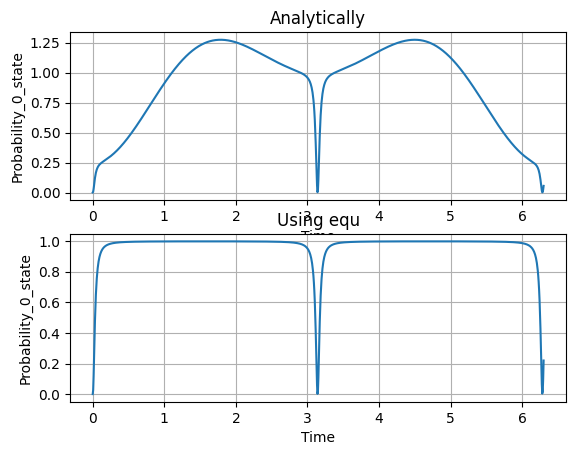

In [180]:
#  == Plot for CFI ==
N = 1000
tau_CFI = np.linspace(-0.001, 6.3, N)

CFI_numpy = np.zeros(N)
CFI_equ_array = np.zeros(N)

# CFI_numpy[0] = CFI(tau_CFI[0])

# CFI_numpy

# CFI -> Approcach with array index
for i in range(len(tau_CFI)):
    CFI_numpy[i] = CFI_2(tau_CFI[i])
    CFI_equ_array[i] = CFI_equ(tau_CFI[i])


plt.subplot(211)
plt.plot(tau_CFI, CFI_numpy)
plt.title('Analytically')
plt.xlabel('Time')
plt.ylabel('Probability_0_state')
# plt.legend()
plt.grid()



plt.subplot(212)
plt.plot(tau_CFI, CFI_equ_array)
plt.title('Using equ')
plt.xlabel('Time')
plt.ylabel('Probability_0_state')
# plt.legend()
plt.grid()

In [183]:
# post-selected density matrix

def rho_ps(t1, t2, phi, gamma):
	density_matrix_ps = np.array([ [(gamma - 1)*(np.exp(t1/t2) + np.cos(phi)), 1.j * np.sqrt(1-gamma)*np.sin(phi)], 
                               [-1.j * np.sqrt(1-gamma)*np.sin(phi), np.cos(phi) - np.exp(t1/t2)] ]) / (gamma*np.cos(phi) + (gamma-2)*np.exp(t1/t2))
	
	return density_matrix_ps

rho_ps(1, 1, np.pi, 0.5)


array([[ 0.18769097-0.0000000e+00j, -0.        -1.8917983e-17j],
       [-0.        +1.8917983e-17j,  0.81230903-0.0000000e+00j]])